In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.2 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="6Mtasz76njBtqTQgOjjr")
project = rf.workspace("cardetetction").project("car-jgm0v")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Car-2 in yolov8:: 100%|██████████| 4012/4012 [00:03<00:00, 1218.24it/s]


In [ ]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
from google.colab.patches import cv2_imshow
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import cv2
import numpy as np
import os

In [ ]:
class CarDetector:
    def __init__(self):
        self.model = fasterrcnn_resnet50_fpn(pretrained=True)
        self.model.eval()

    def detect_cars(self, image_path, labels_dir):
        image = Image.open(image_path)
        image_tensor = F.to_tensor(image)
        # We won't use the model's output, we will use the labels instead
        # outputs = self.model([image_tensor])

        # Load bounding boxes from the labels directory
        label_file = os.path.join(labels_dir, os.path.basename(image_path).replace('.jpg', '.txt'))
        bounding_boxes = []
        if os.path.exists(label_file):
            with open(label_file, 'r') as f:
                for line in f:
                    class_label, x_center, y_center, width, height = map(float, line.split())
                    bounding_boxes.append([class_label, x_center, y_center, width, height])

        return image, bounding_boxes

In [ ]:
# Usage example
car_detector = CarDetector()
images_dir = '/content/Car-2/valid/images'
labels_dir = '/content/Car-2/valid/labels'
image_path = '/content/Car-2/valid/images/adit_mp4-1003_jpg.rf.4044e4fdd050b187b388a4f72c80a170.jpg'
original_image, bounding_boxes = car_detector.detect_cars(image_path, labels_dir)


In [ ]:
# Draw bounding boxes from label files
# image_width, image_height = original_image.size
# for box in bounding_boxes:
#    _, x_center, y_center, width, height = box
#    x1 = int((x_center - width / 2) * image_width)
#    y1 = int((y_center - height / 2) * image_height)
#    x2 = int((x_center + width / 2) * image_width)
 #   y2 = int((y_center + height / 2) * image_height)
 #   cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)


Number of cars detected: 13


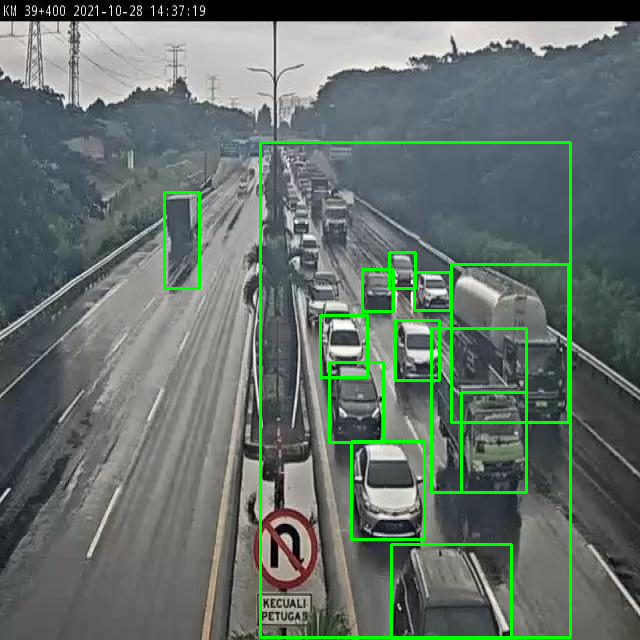

In [ ]:
# Convert the PIL Image to a NumPy array for OpenCV
image_np = np.array(original_image)
# Convert RGB to BGR
image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

# Draw bounding boxes from label files
image_width, image_height = original_image.size

# Counter for the number of cars detected
car_count = 0

for box in bounding_boxes:
    _, x_center, y_center, width, height = box
    x1 = int((x_center - width / 2) * image_width)
    y1 = int((y_center - height / 2) * image_height)
    x2 = int((x_center + width / 2) * image_width)
    y2 = int((y_center + height / 2) * image_height)
    cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)
    car_count += 1

# Print the total number of cars detected
print(f"Number of cars detected: {car_count}")

# Display the image with bounding boxes
cv2_imshow(image_np)

In [ ]:
class CarDetector:
    def __init__(self):
        self.model = fasterrcnn_resnet50_fpn(pretrained=True)
        self.model.eval()

    def detect_cars(self, image_path):
        image = Image.open(image_path)
        image_tensor = F.to_tensor(image)
        outputs = self.model([image_tensor])

        bounding_boxes = []
        class_0_count = 0  # Counter for class 0
        for box in outputs[0]['boxes']:
            x_min, y_min, x_max, y_max = box.tolist()
            class_label = 0  # Assuming class label 0 for cars
            if class_label == 0:
                class_0_count += 1
            x_center = (x_min + x_max) / 2
            y_center = (y_min + y_max) / 2
            width = x_max - x_min
            height = y_max - y_min
            bounding_boxes.append([class_label, x_center, y_center, width, height])

        return image, bounding_boxes, class_0_count

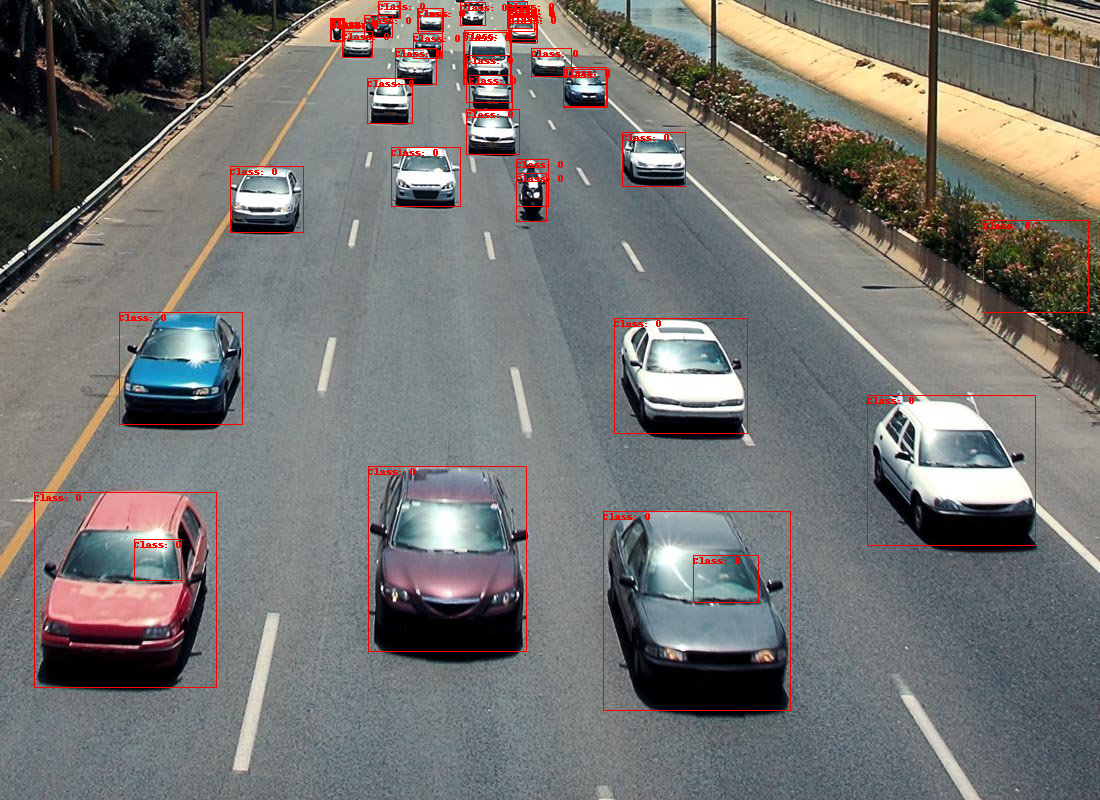

Number of class 0 labels detected: 44


In [ ]:
# Example usage
detector = CarDetector()
image_path = "/content/27094_3063d356a3a54cc3859537fd23c5ba9d_1539205710.jpeg"
image, bounding_boxes, class_0_count = detector.detect_cars(image_path)
draw_bounding_boxes(image, bounding_boxes)
print("Number of class 0 labels detected:", class_0_count)

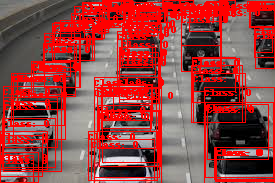

Number of class 0 labels detected: 94


In [ ]:
# Example usage
detector = CarDetector()
image_path = "//content/download.jfif"
image, bounding_boxes, class_0_count = detector.detect_cars(image_path)
draw_bounding_boxes(image, bounding_boxes)
print("Number of class 0 labels detected:", class_0_count)

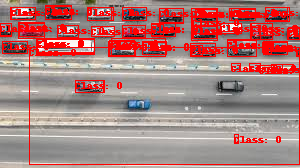

Number of class 0 labels detected: 65


In [ ]:
# Example usage
detector = CarDetector()
image_path = "/content/images.jfif"
image, bounding_boxes, class_0_count = detector.detect_cars(image_path)
draw_bounding_boxes(image, bounding_boxes)
print("Number of class 0 labels detected:", class_0_count)